#RNN example

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        # initialize hidden state
        h0 = torch.zeros(1, input.size(0), self.hidden_size)

        # pass input through the RNN layer
        output, hidden = self.rnn(input, h0)

        # pass the output through the fully connected layer
        output = self.fc(output)

        return output

In [3]:
# define input and output sizes
input_size = 1
output_size = 1
hidden_size = 20

# define the RNN model
rnn = RNN(input_size, hidden_size=hidden_size, output_size=output_size)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# generate some dummy data for training
num_examples = 100
seq_length = 5

inputs = torch.randn(num_examples, seq_length, input_size) #시퀀스가 몇개인지, 시퀀스당 길이, 인풋 벡터 사이즈
targets = inputs * 2 + 4

In [4]:
# train the RNN model
for epoch in range(300):
    optimizer.zero_grad()

    # forward pass
    outputs = rnn(inputs)

    # calculate loss
    loss = criterion(outputs, targets)

    # backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], MSE: {:.4f}'.format(epoch+1, 100, loss.item()))

Epoch [10/100], MSE: 8.5309
Epoch [20/100], MSE: 4.6252
Epoch [30/100], MSE: 4.3939
Epoch [40/100], MSE: 3.3215
Epoch [50/100], MSE: 2.5139
Epoch [60/100], MSE: 1.1198
Epoch [70/100], MSE: 0.4706
Epoch [80/100], MSE: 0.2959
Epoch [90/100], MSE: 0.2199
Epoch [100/100], MSE: 0.1915
Epoch [110/100], MSE: 0.1738
Epoch [120/100], MSE: 0.1588
Epoch [130/100], MSE: 0.1457
Epoch [140/100], MSE: 0.1343
Epoch [150/100], MSE: 0.1239
Epoch [160/100], MSE: 0.1143
Epoch [170/100], MSE: 0.1053
Epoch [180/100], MSE: 0.0969
Epoch [190/100], MSE: 0.0891
Epoch [200/100], MSE: 0.0819
Epoch [210/100], MSE: 0.0753
Epoch [220/100], MSE: 0.0692
Epoch [230/100], MSE: 0.0637
Epoch [240/100], MSE: 0.0587
Epoch [250/100], MSE: 0.0541
Epoch [260/100], MSE: 0.0500
Epoch [270/100], MSE: 0.0462
Epoch [280/100], MSE: 0.0428
Epoch [290/100], MSE: 0.0397
Epoch [300/100], MSE: 0.0369


In [5]:
inputs.shape

torch.Size([100, 5, 1])

In [6]:
inputs

tensor([[[ 1.2246e-01],
         [ 7.2200e-01],
         [-1.5605e-01],
         [ 3.7280e-02],
         [-3.2317e-01]],

        [[ 1.2887e+00],
         [-2.4226e-02],
         [-1.1850e+00],
         [-2.1312e+00],
         [ 9.1902e-01]],

        [[-1.0730e+00],
         [ 9.1579e-01],
         [ 9.7656e-02],
         [ 9.5461e-01],
         [ 8.5042e-01]],

        [[ 9.7453e-01],
         [-4.6367e-01],
         [ 9.3824e-01],
         [-2.9046e-01],
         [-1.0186e+00]],

        [[-7.2569e-01],
         [-3.9941e-01],
         [ 1.7976e-01],
         [-1.1890e+00],
         [-1.6728e+00]],

        [[-3.5667e-01],
         [ 1.3236e+00],
         [-1.0743e+00],
         [-8.0418e-02],
         [-8.5609e-01]],

        [[ 4.9713e-01],
         [-7.4168e-01],
         [-1.2021e+00],
         [-2.7361e-01],
         [-3.4056e-02]],

        [[ 1.0094e-01],
         [-3.8115e-01],
         [ 8.5516e-01],
         [-4.8893e-01],
         [ 1.7078e+00]],

        [[-7.8205e-01],


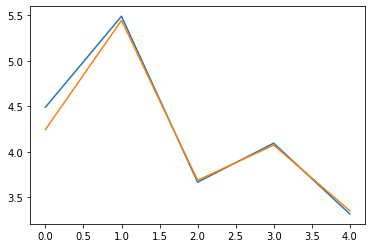

In [7]:
import matplotlib.pyplot as plt

plt.plot(outputs[0].detach().numpy())
plt.plot(targets[0].detach().numpy())

#KOSPI prediction

##데이터 및 라이브러리 임포트

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Deep Learning 연습/Pytorch/kospi_data.csv')
data = data.iloc[:, :2]
data.head(5)

,Date,Close
0,1981-05-01,123.6
1,1981-05-02,123.5
2,1981-05-04,120.6
3,1981-05-06,120.7
4,1981-05-07,119.3


##수익률 칼럼 생성
뉴럴넷 예측의 경우 시계열의 정상성 가정은 불필요<br>
하지만 스케일링 과정에서 평균, 표준편차 계산이 사용되므로<br>
test set에서 스케일러를 적용하려면 정상 시계열을 사용해야 타당함

In [109]:
data_pr = data.iloc[:]
data_pr['Rate'] = np.log(data['Close']/data['Close'].shift(1))
data_pr = data_pr.dropna()
data_pr.head(5)

,Date,Close,Rate
1,1981-05-02,123.5,-0.000809
2,1981-05-04,120.6,-0.023762
3,1981-05-06,120.7,0.000829
4,1981-05-07,119.3,-0.011667
5,1981-05-08,118.7,-0.005042


##훈련 데이터셋 분리 및 스케일링, 텐서화

In [110]:
data_train = data_pr.iloc[:8001, :].reset_index(drop=True)
data_train.head(5)

,Date,Close,Rate
0,1981-05-02,123.5,-0.000809
1,1981-05-04,120.6,-0.023762
2,1981-05-06,120.7,0.000829
3,1981-05-07,119.3,-0.011667
4,1981-05-08,118.7,-0.005042


In [111]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
data_train['Rate'] = scaler_train.fit_transform(data_train['Rate'].to_numpy().reshape(-1, 1))

In [112]:
X_train = data_train.iloc[:8000, :].reset_index(drop=True)
y_train = data_train.iloc[1:8001, :].reset_index(drop=True)

In [113]:
def window_slider(df, where_col, sample_size, vec_size, seq_size):

  """
  window slider와 tensor화를 동시에 진행
  df: 대상 pandas df, where_col: tensor화할 칼럼 인덱스
  sample_size: 샘플에 포함되는 날짜 개수, vec_size: 벡터당 길이, seq_size: 시퀀스당 길이
  """

  where_col = int(where_col)
  sample_size = int(sample_size)  
  vec_size = int(vec_size)
  seq_size = int(seq_size)

  mat = np.zeros((sample_size - seq_size + 1, vec_size, seq_size))

  for i in range(sample_size - seq_size + 1):
    mat[i] = df.iloc[i:seq_size+i, where_col]

    output = torch.from_numpy(mat)
    output = output.permute(0,2,1)
    output = output.to(dtype=torch.float32)

  return output

In [114]:
X_train_ws = window_slider(X_train, 2, 8000, 1, 5)
print(X_train_ws[:3, :])
print(X_train_ws[-3:, :])
print(X_train_ws.shape)

tensor([[[-0.0716],
         [-1.5195],
         [ 0.0318],
         [-0.7565],
         [-0.3386]],

        [[-1.5195],
         [ 0.0318],
         [-0.7565],
         [-0.3386],
         [ 0.0326]],

        [[ 0.0318],
         [-0.7565],
         [-0.3386],
         [ 0.0326],
         [-0.0205]]])
tensor([[[-1.7781],
         [ 0.8341],
         [ 0.9834],
         [ 0.5763],
         [ 0.6934]],

        [[ 0.8341],
         [ 0.9834],
         [ 0.5763],
         [ 0.6934],
         [-0.4389]],

        [[ 0.9834],
         [ 0.5763],
         [ 0.6934],
         [-0.4389],
         [ 1.1844]]])
torch.Size([7996, 5, 1])


In [115]:
y_train_ws = window_slider(y_train, 2, 8000, 1, 5)
print(y_train_ws[:3, :])
print(y_train_ws[-3:, :])
print(y_train_ws.shape)

tensor([[[-1.5195],
         [ 0.0318],
         [-0.7565],
         [-0.3386],
         [ 0.0326]],

        [[ 0.0318],
         [-0.7565],
         [-0.3386],
         [ 0.0326],
         [-0.0205]],

        [[-0.7565],
         [-0.3386],
         [ 0.0326],
         [-0.0205],
         [ 0.5609]]])
tensor([[[ 0.8341],
         [ 0.9834],
         [ 0.5763],
         [ 0.6934],
         [-0.4389]],

        [[ 0.9834],
         [ 0.5763],
         [ 0.6934],
         [-0.4389],
         [ 1.1844]],

        [[ 0.5763],
         [ 0.6934],
         [-0.4389],
         [ 1.1844],
         [ 0.0664]]])
torch.Size([7996, 5, 1])


##모델 클래스 정의

In [78]:
# define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, input):
        # initialize hidden state
        h0 = torch.zeros(1, input.size(0), self.hidden_size)

        # pass input through the RNN layer
        output, hidden = self.rnn(input, h0)

        # pass the output through the fully connected layer
        output = self.fc1(F.tanh(output))
        output = self.fc2(F.tanh(output))
        output = self.fc3(F.tanh(output))

        return output

In [79]:
# define input and output sizes
input_size = 1
output_size = 1
hidden_size = 20
seq_length = 5

# define the RNN model
rnn = RNN(input_size, hidden_size=hidden_size, output_size=output_size)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [80]:
# train the RNN model
for epoch in range(10000):
    optimizer.zero_grad()

    # forward pass
    outputs = rnn(X_train_ws)

    # calculate loss
    loss = criterion(outputs, y_train_ws)

    # backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], MSE: {:.4f}'.format(epoch+1, 1000, loss.item()))

Epoch [1000/1000], MSE: 0.8944
Epoch [2000/1000], MSE: 0.8704
Epoch [3000/1000], MSE: 0.8614
Epoch [4000/1000], MSE: 0.8604
Epoch [5000/1000], MSE: 0.8543
Epoch [6000/1000], MSE: 0.8563
Epoch [7000/1000], MSE: 0.8542
Epoch [8000/1000], MSE: 0.8552
Epoch [9000/1000], MSE: 0.8532
Epoch [10000/1000], MSE: 0.8539


##train set 내에서 1차 검증

In [130]:
with torch.no_grad():
  pred = rnn(X_train_ws)
  pred = pred.detach().numpy()
  pred = pred[:, -1]
  pred = pred[:, 0]
  pred = scaler_train.inverse_transform(pred.reshape(1, -1))
  pred = pred[0]

data_train['Rate_fitted'] = range(len(data_train))
data_train['Rate_fitted'][5:] = pred

data_train['Close_fitted'] = range(len(data_train))
data_train['Close_fitted'] = (1+data_train['Rate_fitted']) * data_train['Close'].shift(1)

data_train.iloc[:5, 3:] = np.nan

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
<ipython-input-130-c5732ae18f55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Rate_fitted'][5:] = pred


In [134]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_train.head(10)

,Date,Close,Rate,Rate_fitted,Close_fitted
0,1981-05-02,123.5,-0.071557,NaN,NaN
1,1981-05-04,120.6,-1.519453,NaN,NaN
2,1981-05-06,120.7,0.031786,NaN,NaN
3,1981-05-07,119.3,-0.756468,NaN,NaN
4,1981-05-08,118.7,-0.338562,NaN,NaN
5,1981-05-09,118.8,0.032623,0.000019,118.702306
6,1981-05-12,118.8,-0.020499,-0.002301,118.526628
7,1981-05-13,119.9,0.560909,-0.000227,118.773048
8,1981-05-14,121.5,0.815732,0.001488,120.078400
9,1981-05-15,121.4,-0.072440,0.002699,121.827896


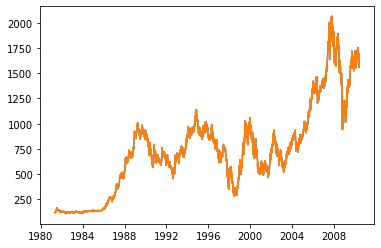

In [136]:
plt.plot(data_train['Date'], data_train['Close_fitted'])
plt.plot(data_train['Date'], data_train['Close'])

##test set 적용

In [146]:
data_test = data_pr.iloc[8001:-21, :].reset_index(drop=True)
print(data_test.head(5))
print(len(data_test))

         Date    Close      Rate
0  2010-06-07  1637.97 -0.015845
1  2010-06-08  1651.48  0.008214
2  2010-06-09  1647.22 -0.002583
3  2010-06-10  1651.70  0.002716
4  2010-06-11  1675.34  0.014211
3001


In [147]:
X_test = data_test.iloc[:-1, :].reset_index(drop=True)
y_test = data_test.iloc[1:, :].reset_index(drop=True)

In [148]:
X_test_ws = window_slider(X_test, 2, 3000, 1, 5)
print(X_test_ws[:3, :])
print(X_test_ws[-3:, :])
print(X_test_ws.shape)

tensor([[[-0.0158],
         [ 0.0082],
         [-0.0026],
         [ 0.0027],
         [ 0.0142]],

        [[ 0.0082],
         [-0.0026],
         [ 0.0027],
         [ 0.0142],
         [ 0.0091]],

        [[-0.0026],
         [ 0.0027],
         [ 0.0142],
         [ 0.0091],
         [-0.0003]]])
tensor([[[ 0.0093],
         [-0.0067],
         [ 0.0044],
         [ 0.0038],
         [ 0.0011]],

        [[-0.0067],
         [ 0.0044],
         [ 0.0038],
         [ 0.0011],
         [ 0.0081]],

        [[ 0.0044],
         [ 0.0038],
         [ 0.0011],
         [ 0.0081],
         [ 0.0066]]])
torch.Size([2996, 5, 1])


In [149]:
y_test_ws = window_slider(y_test, 2, 3000, 1, 5)
print(y_test_ws[:3, :])
print(y_test_ws[-3:, :])
print(y_test_ws.shape)

tensor([[[ 0.0082],
         [-0.0026],
         [ 0.0027],
         [ 0.0142],
         [ 0.0091]],

        [[-0.0026],
         [ 0.0027],
         [ 0.0142],
         [ 0.0091],
         [-0.0003]],

        [[ 0.0027],
         [ 0.0142],
         [ 0.0091],
         [-0.0003],
         [ 0.0090]]])
tensor([[[-0.0067],
         [ 0.0044],
         [ 0.0038],
         [ 0.0011],
         [ 0.0081]],

        [[ 0.0044],
         [ 0.0038],
         [ 0.0011],
         [ 0.0081],
         [ 0.0066]],

        [[ 0.0038],
         [ 0.0011],
         [ 0.0081],
         [ 0.0066],
         [ 0.0003]]])
torch.Size([2996, 5, 1])


In [150]:
with torch.no_grad():
  pred = rnn(X_test_ws)
  pred = pred.detach().numpy()
  pred = pred[:, -1]
  pred = pred[:, 0]
  pred = scaler_train.inverse_transform(pred.reshape(1, -1))
  pred = pred[0]

data_test['Rate_fitted'] = range(len(data_test))
data_test['Rate_fitted'][5:] = pred

data_test['Close_fitted'] = range(len(data_test))
data_test['Close_fitted'] = (1+data_test['Rate_fitted']) * data_test['Close'].shift(1)

data_test.iloc[:5, 3:] = np.nan

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
<ipython-input-150-82fb5645e5dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Rate_fitted'][5:] = pred


In [152]:
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test.head(10)

,Date,Close,Rate,Rate_fitted,Close_fitted
0,2010-06-07,1637.97,-0.015845,NaN,NaN
1,2010-06-08,1651.48,0.008214,NaN,NaN
2,2010-06-09,1647.22,-0.002583,NaN,NaN
3,2010-06-10,1651.70,0.002716,NaN,NaN
4,2010-06-11,1675.34,0.014211,NaN,NaN
5,2010-06-14,1690.60,0.009067,0.000442,1676.080754
6,2010-06-15,1690.03,-0.000337,0.000396,1691.268667
7,2010-06-16,1705.33,0.009012,0.000367,1690.650625
8,2010-06-17,1707.92,0.001518,0.000404,1706.019729
9,2010-06-18,1711.95,0.002357,0.000359,1708.533768


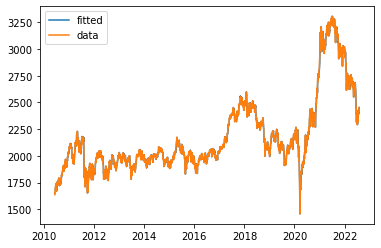

In [156]:
plt.plot(data_test['Date'], data_test['Close_fitted'], label = 'fitted')
plt.plot(data_test['Date'], data_test['Close'], label = 'data')
plt.legend()

In [157]:
np.sqrt(np.mean(((data_test['Close_fitted'] - data_test['Close'])/data_test['Close'])**2))

0.01043193378112479

In [158]:
np.sqrt(np.mean(((data_test['Close'].shift(1) - data_test['Close'])/data_test['Close'])**2))

0.01042297820988046